<h1> Practical Data Science Assignment1 </h1>

<h2> Question 1 </h2>

First import the data and combine into a dataframe for year 2015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#csvs are placed in folder, named appropriately during download
january = 'nodiverts/january.csv'
february = 'nodiverts/february.csv'
march = 'nodiverts/march.csv'
april = 'nodiverts/april.csv'
may = 'nodiverts/may.csv'
june ='nodiverts/june.csv'
july ='nodiverts/july.csv'
august ='nodiverts/august.csv'
september ='nodiverts/september.csv'
october ='nodiverts/october.csv'
november = 'nodiverts/november.csv'
december = 'nodiverts/december.csv'

#import all csv files
jan=pd.read_csv(january,usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
feb=pd.read_csv(february, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
mar=pd.read_csv(march, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
apr=pd.read_csv(april, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST','DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
may=pd.read_csv(may, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
jun=pd.read_csv(june, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
jul=pd.read_csv(july, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
aug=pd.read_csv(august, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
sep=pd.read_csv(september, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
oct=pd.read_csv(october, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
nov=pd.read_csv(november, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
dec=pd.read_csv(december, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})

#concatenate all dataframes to one for the year 2015
frames=[jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]
flights = pd.concat(frames,axis=0, ignore_index=True)

In [2]:
flights.sample()

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS
4152841,9,HA,LIH,OGG,30.0,1


Now take care of outliers. 
Calculate total flights per airport and map it to flights DataFrame.
Make new table  and discard rows < percentile(1)

In [3]:
flights_per_airport= flights.groupby(by=['ORIGIN'])['FLIGHTS'].sum()
flights['FLIGHTS_SUM'] = flights['ORIGIN'].map(flights_per_airport)
flights_without_outlier = flights[flights.FLIGHTS_SUM > np.percentile(flights_per_airport,1)]


In [4]:
flights_without_outlier.head(10)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,108195
1,1,DL,ATL,LGA,26.0,1,379424
2,1,DL,SAN,DTW,0.0,1,76416
3,1,DL,ATL,AGS,0.0,1,379424
4,1,DL,ATL,IAH,0.0,1,379424
5,1,DL,IAH,ATL,0.0,1,159833
6,1,DL,DTW,LAS,0.0,1,118425
7,1,DL,ATL,TPA,0.0,1,379424
8,1,DL,PHX,MSP,0.0,1,159736
9,1,DL,DTW,ORD,32.0,1,118425


In [5]:
flights_without_outlier = flights_without_outlier.reset_index()

In [6]:
flights_without_outlier=flights_without_outlier.drop({'index','MONTH','CARRIER','DEST','FLIGHTS','FLIGHTS_SUM'},1)


In [7]:
flights_without_outlier.head(15)

,ORIGIN,DEP_DELAY_NEW
0,LGA,0.0
1,ATL,26.0
2,SAN,0.0
3,ATL,0.0
4,ATL,0.0
5,IAH,0.0
6,DTW,0.0
7,ATL,0.0
8,PHX,0.0
9,DTW,32.0


Now check unique # of ORIGIN of origin df flights VS flights_without_outliers

In [8]:
flights.ORIGIN.describe()

count     5819079
unique        322
top           ATL
freq       379424
Name: ORIGIN, dtype: object

In [9]:
flights_without_outlier.ORIGIN.describe()

count     5818828
unique        318
top           ATL
freq       379424
Name: ORIGIN, dtype: object

We can see that we deleted 4 airports this way.
Now to calculate probability of delay, we add a new boolean column HAS_DELAY, whose condition is DEP_DELAY_NEW > 0.0

In [10]:
flights_without_outlier.sample()

,ORIGIN,DEP_DELAY_NEW
2317493,SLC,0.0


In [11]:
flights_without_outlier['HAS_DELAY']= (flights_without_outlier['DEP_DELAY_NEW'] > 0.0)
flights_without_outlier.sample()

,ORIGIN,DEP_DELAY_NEW,HAS_DELAY
1538993,TUL,9.0,True


In [12]:
flights_without_outlier = flights_without_outlier.drop(['DEP_DELAY_NEW'],1)

In [13]:
flights_without_outlier.sample()

,ORIGIN,HAS_DELAY
1760777,GRR,False


Make a new groupedby object that has index ORIGIN so we can calculate Delay(True) vs non-Delay(False = 0.0)

In [14]:
groupedby=flights_without_outlier.groupby(['ORIGIN','HAS_DELAY']).size()

In [15]:
groupedby=groupedby.unstack()

In [16]:
groupedby.head(10)

HAS_DELAY,False,True
ORIGIN,,
ABE,1834,679
ABI,1934,596
ABQ,13330,7678
ABR,586,156
ABY,739,224
ACK,300,220
ACT,1349,411
ACV,1004,438
ACY,2562,1258


In [17]:
groupedby['Probability of delay'] = groupedby[1] / (groupedby[1] + groupedby[0])

In [18]:
groupedby = groupedby.sort_values('Probability of delay',ascending=False)

In [19]:
groupedby.head(15)

HAS_DELAY,False,True,Probability of delay
ORIGIN,,,
GUM,131,234,0.641096
ADK,45,60,0.571429
ILG,45,55,0.550000
MVY,100,116,0.537037
DAL,31904,33725,0.513873
MDW,44578,43925,0.496311
BWI,48775,45326,0.481674
HOU,29495,27265,0.480356
PBG,160,134,0.455782


Now to find the mean and median of delay per each airport. Use a df that consists of ORIGIN and DEP_DELAY_NEW, discard delays <= 0.0 and create a groupedby object, requesting the aggregates of mean and median.

In [20]:
flights_without_outlier = flights[flights.FLIGHTS_SUM > np.percentile(flights_per_airport,1)]
flights_without_outlier.head(10)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,108195
1,1,DL,ATL,LGA,26.0,1,379424
2,1,DL,SAN,DTW,0.0,1,76416
3,1,DL,ATL,AGS,0.0,1,379424
4,1,DL,ATL,IAH,0.0,1,379424
5,1,DL,IAH,ATL,0.0,1,159833
6,1,DL,DTW,LAS,0.0,1,118425
7,1,DL,ATL,TPA,0.0,1,379424
8,1,DL,PHX,MSP,0.0,1,159736
9,1,DL,DTW,ORD,32.0,1,118425


In [21]:
flights_without_outlier = flights_without_outlier.drop({'MONTH','CARRIER','DEST','FLIGHTS','FLIGHTS_SUM'},1)

In [22]:
flights_without_outlier=flights_without_outlier.reset_index()


In [23]:
flights_without_outlier = flights_without_outlier.drop(['index'],1)

In [24]:
flights_without_outlier.head(10)

,ORIGIN,DEP_DELAY_NEW
0,LGA,0.0
1,ATL,26.0
2,SAN,0.0
3,ATL,0.0
4,ATL,0.0
5,IAH,0.0
6,DTW,0.0
7,ATL,0.0
8,PHX,0.0
9,DTW,32.0


In [25]:
flights_with_delay = flights_without_outlier[(flights_without_outlier['DEP_DELAY_NEW'] > 0.0)]

In [26]:
flights_with_delay.head(10)

,ORIGIN,DEP_DELAY_NEW
1,ATL,26.0
9,DTW,32.0
10,ORD,6.0
12,PHL,6.0
14,BWI,2.0
19,ATL,1.0
26,LAX,4.0
35,ATL,57.0
36,FLL,6.0
38,DEN,3.0


In [27]:
flights_with_delay.head(10)

,ORIGIN,DEP_DELAY_NEW
1,ATL,26.0
9,DTW,32.0
10,ORD,6.0
12,PHL,6.0
14,BWI,2.0
19,ATL,1.0
26,LAX,4.0
35,ATL,57.0
36,FLL,6.0
38,DEN,3.0


In [28]:
flights_with_delay = flights_with_delay.reset_index()

In [29]:
flights_with_delay= flights_with_delay.drop(['index'],1)

In [30]:
flights_with_delay.head(10)

,ORIGIN,DEP_DELAY_NEW
0,ATL,26.0
1,DTW,32.0
2,ORD,6.0
3,PHL,6.0
4,BWI,2.0
5,ATL,1.0
6,LAX,4.0
7,ATL,57.0
8,FLL,6.0
9,DEN,3.0


In [31]:
flights_with_delay.ORIGIN.describe()

count     2125507
unique        318
top           ATL
freq       139519
Name: ORIGIN, dtype: object

Now combine to groupbyorigin

groupedbyorigin = flights_with_delay.groupby(['ORIGIN']).agg(['mean','median])

In [32]:
groupedbyorigin = flights_with_delay.groupby(['ORIGIN']).agg(['mean','median'])

In [33]:
groupedbyorigin.head(10)

DEP_DELAY_NEW       
                mean median
ORIGIN                     
ABE        44.432990   16.0
ABI        44.629195   19.0
ABQ        31.197317   14.0
ABR        58.679487   18.0
ABY        52.031250   27.0
ACK        46.881818   18.5
ACT        49.540146   23.0
ACV        52.123288   35.0
ACY        40.457870   18.0
ADK        28.250000   20.5

Combine results of probability and mean/median

In [34]:
framesfinal = [groupedby,groupedbyorigin]


In [35]:
resultq1 = pd.concat(framesfinal,axis=1)


<h4> Final Table </h4>

In [36]:
resultq1 = resultq1.sort_values('Probability of delay',ascending=False)
resultq1.head(20)


HAS_DELAY,False,True,Probability of delay,"(DEP_DELAY_NEW, mean)","(DEP_DELAY_NEW, median)"
GUM,131,234,0.641096,26.085470,12.0
ADK,45,60,0.571429,28.250000,20.5
ILG,45,55,0.550000,58.345455,30.0
MVY,100,116,0.537037,49.827586,19.0
DAL,31904,33725,0.513873,25.450289,12.0
MDW,44578,43925,0.496311,26.947547,13.0
BWI,48775,45326,0.481674,29.969664,14.0
HOU,29495,27265,0.480356,27.475371,13.0
PBG,160,134,0.455782,38.440299,23.0
UST,93,76,0.449704,39.026316,22.0




<h2> Question 2 </h2>


In [37]:
flights.head(10)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,108195
1,1,DL,ATL,LGA,26.0,1,379424
2,1,DL,SAN,DTW,0.0,1,76416
3,1,DL,ATL,AGS,0.0,1,379424
4,1,DL,ATL,IAH,0.0,1,379424
5,1,DL,IAH,ATL,0.0,1,159833
6,1,DL,DTW,LAS,0.0,1,118425
7,1,DL,ATL,TPA,0.0,1,379424
8,1,DL,PHX,MSP,0.0,1,159736
9,1,DL,DTW,ORD,32.0,1,118425


In [38]:
flights_per_carrier = flights.drop({'MONTH','ORIGIN','DEST','FLIGHTS','FLIGHTS_SUM'},1)

In [39]:
flights_per_carrier['HAS_DELAY'] = (flights_per_carrier['DEP_DELAY_NEW'] > 0.0)

In [40]:
flights_per_carrier.head(10)

,CARRIER,DEP_DELAY_NEW,HAS_DELAY
0,DL,0.0,False
1,DL,26.0,True
2,DL,0.0,False
3,DL,0.0,False
4,DL,0.0,False
5,DL,0.0,False
6,DL,0.0,False
7,DL,0.0,False
8,DL,0.0,False
9,DL,32.0,True


In [41]:
flights_per_carrier2 = flights_per_carrier.drop(['DEP_DELAY_NEW'],1)

In [42]:
flights_per_carrier2.head(10)

,CARRIER,HAS_DELAY
0,DL,False
1,DL,True
2,DL,False
3,DL,False
4,DL,False
5,DL,False
6,DL,False
7,DL,False
8,DL,False
9,DL,True


In [43]:
groupedbycarrier = flights_per_carrier2.groupby(['CARRIER','HAS_DELAY']).size()

In [44]:
groupedbycarrier = groupedbycarrier.unstack()

In [45]:
groupedbycarrier

HAS_DELAY,False,True
CARRIER,,
AA,480080,245904
AS,128955,43566
B6,164987,102061
DL,593418,282463
EV,402080,169897
F9,55943,34893
HA,56126,20146
MQ,200906,93726
NK,65290,52089


In [46]:
groupedbycarrier['Probability of delay'] = groupedbycarrier[1] / (groupedbycarrier[1] + groupedbycarrier[0])

In [47]:
groupedbycarrier.head(10)

HAS_DELAY,False,True,Probability of delay
CARRIER,,,
AA,480080,245904,0.338718
AS,128955,43566,0.252526
B6,164987,102061,0.382182
DL,593418,282463,0.322490
EV,402080,169897,0.297035
F9,55943,34893,0.384132
HA,56126,20146,0.264134
MQ,200906,93726,0.318112
NK,65290,52089,0.443768


In [48]:
groupedbycarrier = groupedbycarrier.sort_values('Probability of delay',ascending=False)

Probability table of delay per carrier,descending order

In [49]:
groupedbycarrier.head(10)

HAS_DELAY,False,True,Probability of delay
CARRIER,,,
UA,259173,256550,0.497457
WN,695048,566807,0.449186
NK,65290,52089,0.443768
F9,55943,34893,0.384132
B6,164987,102061,0.382182
VX,38524,23379,0.377672
AA,480080,245904,0.338718
DL,593418,282463,0.322490
MQ,200906,93726,0.318112


Now to find the mean and median delays per carrier

In [50]:
flights_per_carrier

,CARRIER,DEP_DELAY_NEW,HAS_DELAY
0,DL,0.0,False
1,DL,26.0,True
2,DL,0.0,False
3,DL,0.0,False
4,DL,0.0,False
5,DL,0.0,False
6,DL,0.0,False
7,DL,0.0,False
8,DL,0.0,False
9,DL,32.0,True


In [51]:
flights_per_carrier3 = flights_per_carrier.drop({'HAS_DELAY'},1)

In [52]:
flights_per_carrier3 = flights_per_carrier3[(flights_per_carrier3['DEP_DELAY_NEW'] > 0.0 )]

In [53]:
flights_per_carrier3 = flights_per_carrier3.reset_index()

In [54]:
flights_per_carrier3= flights_per_carrier3.drop(['index'],1)

In [55]:
groupedbycarriermm = flights_per_carrier3.groupby(['CARRIER']).agg(['mean','median'])

In [56]:
framesfinalq2 = [groupedbycarrier,groupedbycarriermm]
resultq2 = pd.concat(framesfinalq2, axis=1)

In [57]:
resultq2 = resultq2.sort_values('Probability of delay', ascending=False)

Final table for Question2

In [58]:
resultq2.head(20)

HAS_DELAY,False,True,Probability of delay,"(DEP_DELAY_NEW, mean)","(DEP_DELAY_NEW, median)"
UA,259173,256550,0.497457,32.602183,13.0
WN,695048,566807,0.449186,26.952377,13.0
NK,65290,52089,0.443768,41.924149,21.0
F9,55943,34893,0.384132,44.540767,20.0
B6,164987,102061,0.382182,37.617121,18.0
VX,38524,23379,0.377672,30.285983,13.0
AA,480080,245904,0.338718,34.370397,15.0
DL,593418,282463,0.322490,29.687442,12.0
MQ,200906,93726,0.318112,40.163999,21.0
US,136150,62565,0.314848,28.500615,13.0


<h2> Question 3</h2>

Create a new groupby object from the original DataFrame flights, unstack it, and use describe() to get min & max values which will be used as an input to numpy.linspace() function

In [59]:
flights_per_airport_q3 = flights.groupby(['ORIGIN','FLIGHTS']).size()

In [60]:
flights_per_airport_q3 = flights_per_airport_q3.unstack()

In [61]:
flights_per_airport_q3.describe()

FLIGHTS,1
count,322.000000
mean,18071.673913
std,44200.370107
min,34.000000
25%,965.500000
50%,2868.500000
75%,9894.750000
max,379424.000000


In [62]:
import matplotlib.pyplot as plt

In [63]:
import matplotlib
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C8BD04CF8>]], dtype=object)

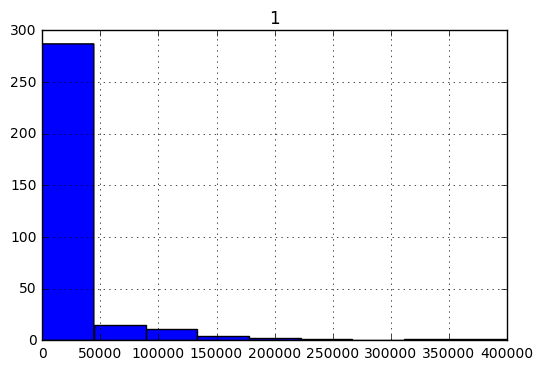

In [64]:
flights_per_airport_q3.hist(bins=np.linspace(0., 400000., 10))

<h2> Question 4 </h2>

In [65]:
flights.head(5)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,108195
1,1,DL,ATL,LGA,26.0,1,379424
2,1,DL,SAN,DTW,0.0,1,76416
3,1,DL,ATL,AGS,0.0,1,379424
4,1,DL,ATL,IAH,0.0,1,379424


From initial flights dataframe, we can create a groupby object by terms MONTH and FLIGHTS_SUM so to later calculate the total for each month by adding columns across the rows

In [66]:
flights_temporal = flights.groupby(['MONTH','FLIGHTS_SUM']).size()

In [67]:
flights_temporal = flights_temporal.unstack()
flights_temporal

FLIGHTS_SUM,34,63,77,83,100,105,116,156,169,190,...,122701,145869,159736,159833,162178,212401,214191,260595,313536,379424
MONTH,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,58.0,26.0,9.0,10.0,36.0,16.0,60.0,...,8903.0,11604.0,13122.0,13376.0,12891.0,17340.0,17090.0,23153.0,23484.0,29512.0
2,6.0,NaN,NaN,25.0,21.0,8.0,8.0,41.0,13.0,56.0,...,8217.0,10570.0,11916.0,12231.0,11569.0,15762.0,15642.0,20839.0,21812.0,27366.0
3,NaN,NaN,NaN,NaN,28.0,9.0,9.0,53.0,13.0,62.0,...,9946.0,12397.0,14526.0,14045.0,13422.0,18014.0,18609.0,23224.0,26129.0,32754.0
4,6.0,NaN,NaN,NaN,25.0,9.0,8.0,9.0,14.0,12.0,...,10018.0,12103.0,13746.0,13507.0,13019.0,17408.0,17509.0,21867.0,25805.0,31370.0
5,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,13.0,NaN,...,10485.0,12744.0,13803.0,14415.0,13543.0,17977.0,18106.0,22160.0,26871.0,32398.0
6,NaN,24.0,48.0,13.0,NaN,8.0,11.0,NaN,13.0,NaN,...,11365.0,12362.0,13871.0,14199.0,13846.0,18533.0,18667.0,22573.0,27591.0,32735.0
7,NaN,31.0,62.0,31.0,NaN,9.0,14.0,NaN,13.0,NaN,...,11814.0,12687.0,14274.0,14029.0,14444.0,19371.0,19076.0,22895.0,28223.0,33735.0
8,NaN,8.0,44.0,31.0,NaN,9.0,11.0,NaN,13.0,NaN,...,11622.0,12698.0,13703.0,13419.0,14590.0,19265.0,18866.0,22298.0,28149.0,33707.0
9,NaN,NaN,NaN,8.0,NaN,8.0,8.0,NaN,13.0,NaN,...,10138.0,12029.0,12023.0,12167.0,13326.0,17499.0,17397.0,20334.0,26163.0,31333.0


Addition operation across column axis to obtain flights total per month

In [68]:
flights_temporal['TOTAL_FLIGHTS'] = flights_temporal[0:292].sum(axis=1)

Create a new dataframe from the initial, in order to keep only flights whose delay is > 0.0, and groupby MONTH and HAS_DELAY .

In [69]:
flights_q1 = flights.drop({'CARRIER','ORIGIN','DEST','FLIGHTS'},1)
flights_q1 =flights_q1.drop(flights_q1['FLIGHTS_SUM'])
flights_q1['HAS_DELAY'] = (flights_q1['DEP_DELAY_NEW'] > 0.0)
flights_q1.head(10)

,MONTH,DEP_DELAY_NEW,FLIGHTS_SUM,HAS_DELAY
0,1,0.0,108195,False
1,1,26.0,379424,True
2,1,0.0,76416,False
3,1,0.0,379424,False
4,1,0.0,379424,False
5,1,0.0,159833,False
6,1,0.0,118425,False
7,1,0.0,379424,False
8,1,0.0,159736,False
9,1,32.0,118425,True


From above dataframe, we will drop the delay(in mins) and groupby MONTH,HAS_DELAY into a new object groupedbymonth

In [70]:
flights_q1 = flights_q1.drop(['DEP_DELAY_NEW'],1)
groupedbymonth = flights_q1.groupby(['MONTH','HAS_DELAY']).size()
groupedbymonth = groupedbymonth.unstack()
groupedbymonth


HAS_DELAY,False,True
MONTH,,
1,293118,176554
2,255749,173442
3,310495,193817
4,317837,167314
5,318137,178856
6,288516,215381
7,311099,209619
8,319696,190840
9,332355,132591


Calculate new dataframe from flights_temporal to hold total flights

In [71]:
flights_temporal = flights_temporal.reset_index()

In [72]:
flights_temporal_final = flights_temporal[['MONTH','TOTAL_FLIGHTS']]

In [73]:
flights_temporal_final

FLIGHTS_SUM,MONTH,TOTAL_FLIGHTS
0,1,469968.0
1,2,429191.0
2,3,504312.0
3,4,485151.0
4,5,496993.0
5,6,503897.0
6,7,520718.0
7,8,510536.0
8,9,464946.0
9,10,486165.0


Now make new and final dataframe that hold total flights and delayed (and non-delayed) per calendar month

In [74]:
groupedbymonth2 = groupedbymonth.reset_index()
q4 = pd.concat([flights_temporal_final,groupedbymonth2],axis=1)
q4

,MONTH,TOTAL_FLIGHTS,MONTH,False,True
0,1,469968.0,1,293118,176554
1,2,429191.0,2,255749,173442
2,3,504312.0,3,310495,193817
3,4,485151.0,4,317837,167314
4,5,496993.0,5,318137,178856
5,6,503897.0,6,288516,215381
6,7,520718.0,7,311099,209619
7,8,510536.0,8,319696,190840
8,9,464946.0,9,332355,132591
9,10,486165.0,10,341063,145102


Finally, set arguments for the pyplot 
On x axis, we want total flights q4['TOTAL_FLIGHTS'] and delayed q4[[4]].

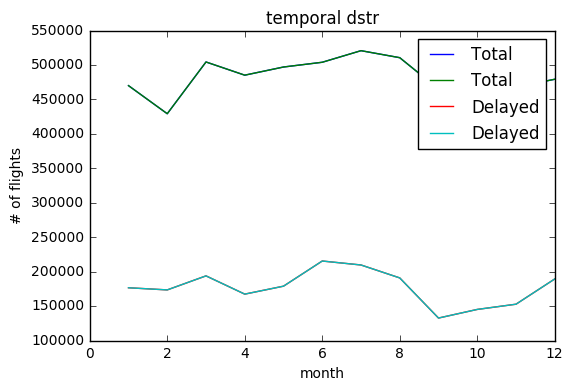

In [75]:
fig=plt.figure()
axes=fig.gca()
x = q4['MONTH']
plt.plot(x,q4['TOTAL_FLIGHTS'], label='Total')
plt.plot(x,q4[[4]], label='Delayed')
plt.xlabel('month')
plt.ylabel('# of flights')
plt.title('temporal dstr')
plt.legend()

<h2> Question 5 </h2>

This shall begin by defining a dataframe which will be the result of a groupby operation on the initial *flights* dataframe, however dropping unnecessary columns and excluding rows with a delay = 0.0.

In [138]:
flights_q5 = flights.drop({'FLIGHTS','FLIGHTS_SUM','MONTH','FLIGHTS_SUM'},1)
flights_q5 = flights_q5[flights_q5['DEP_DELAY_NEW'] > 0.0]
flights_q5 = flights_q5.reset_index()
flights_q5 = flights_q5.drop(['index'],1)
flights_q5.head(20)
flights_q5.shape
groupedbymean = flights_q5.groupby(['ORIGIN','DEST','CARRIER']).mean()
groupedbymean.head(10)

DEP_DELAY_NEW
ORIGIN DEST CARRIER               
ABE    ATL  DL           22.643836
            EV           42.564935
            OO           27.066667
       DTW  EV           48.152466
       ORD  EV           50.551402
ABI    DFW  MQ           44.629195
ABQ    ATL  DL           42.492683
       BWI  WN           23.489726
       CLT  AA           11.600000
            US           23.111111